## Table of Contents



- [Data Preprocessing:](#datapreprocessing)
Once the data has been collected, the next step is to preprocess it. This involves cleaning the data, handling missing values, and removing outliers. The data may also need to be transformed or normalized to ensure that it is suitable for analysis.


### Import dataset

In [1]:
from datetime import date,datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import seaborn as sns

import matplotlib.pyplot as plt

# load the dataset
df = pd.read_csv('../Dataset/20180410_advocacy_interview_data.csv')
df.head()

,EmployeeID,TicketChannel,TicketGroup,TicketID,TicketCreatedDate,ZendeskPlan,DayTicketSolved,AssigneeTier,FirstReplyTime,FullResolutionTime,NumAgentComments,NumPublicComments,TicketEscalated,CustomerSatisfaction,WorkerDateHired,WorkerLocation,Worker_Type,WorkerTenure
0,1,api,Support (T1),2840334,2017-08-04,Trial,Sunday,Tier 1,13.0,33861.0,18.0,36.0,0,NaN,2011-10-18,London,Employee,2117
1,1,email,Support (T1),2136496,2017-01-09,NaN,Wednesday,Tier 1,58.0,73659.0,30.0,70.0,1,1.0,2011-10-18,London,Employee,1910
2,1,facebook,Support (Triage),3034987,2017-10-12,Professional,Friday,Triage,30.0,1741.0,6.0,15.0,0,NaN,2011-10-18,London,Employee,2186
3,1,email,Support (T1),2311824,2017-03-02,NaN,Sunday,Tier 1,78.0,25654.0,5.0,15.0,0,NaN,2011-10-18,London,Employee,1962
4,1,email,Support (T1),2213615,2017-01-30,Professional,Friday,Tier 1,4.0,16266.0,8.0,17.0,0,0.0,2011-10-18,London,Employee,1931


### Data Preprocessing <a id='datapreprocessing'></a>

The first step in data preprocessing is to clean the data by removing any errors or inconsistencies. This can involve removing duplicate records, correcting errors in the data, and handling missing values.

- [Missing Data:](#missingdata):
    - Remove Rows or columns if not necessary
    - Impute data
        - mean
        - median
        - mode
        - [Regression Imputation:](#regressionimputation)
        - [K-nearest Neighbors Imputation:](#knearest)

- [Outliers:](#outliers): 
    - Visual Inspection
    - Winsorization ( replace extreme values with less extreme values)
    - Trimming (remove the outliers)
    - Binning: create interval of values and fill with the mean, median or mode of the values of the interval


- Data Skewness:(when the distributions is not symetrical arround the mean)
    - [Logarithmic Transformation:](#log): Log calculation of the values, good for positive skewd
    - [Square Root Tranformation:](#sqrt): Square root calculation of the values, good for positive skewd
    - [Box-Cox Tranformation:](#bct): Used to transform the data into a normal distribution

- Scalling:
    - Standardization
    - Normalization


## Data Cleaning

<Axes: >

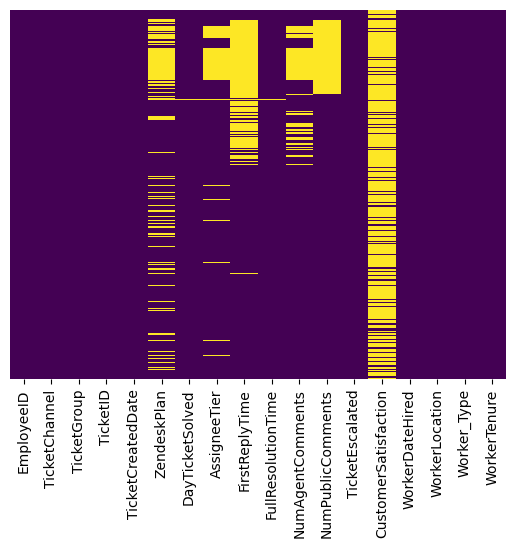

In [2]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Plot distributions

<Axes: xlabel='AssigneeTier', ylabel='Count'>

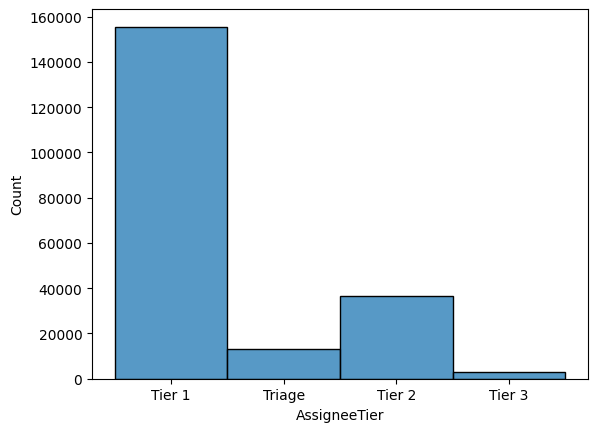

In [3]:
# Categorical Data
sns.histplot(data=df, x="AssigneeTier")


<Axes: xlabel='FullResolutionTime', ylabel='Density'>

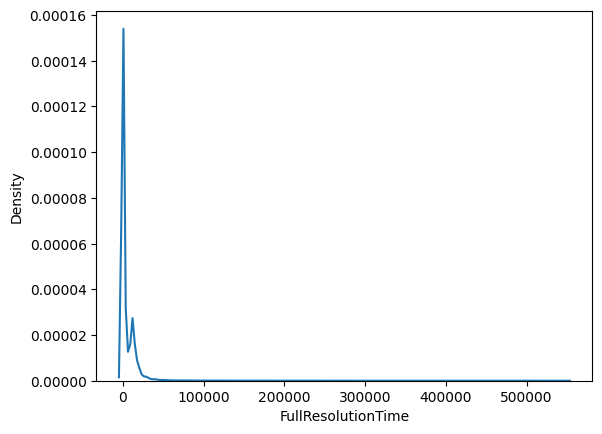

In [4]:
# Continuous data, FullResolutionTime -> that is a positive skewed

#Kernel density plots are commonly used to check the shape of a distribution and compare it to a normal distribution.

sns.kdeplot(data=df, x="FullResolutionTime")


(array([2.36782e+05, 1.48000e+03, 7.06000e+02, 3.58000e+02, 1.77000e+02,
        7.70000e+01, 7.50000e+01, 4.30000e+01, 3.10000e+01, 1.20000e+01]),
 array([     0. ,  54881.4, 109762.8, 164644.2, 219525.6, 274407. ,
        329288.4, 384169.8, 439051.2, 493932.6, 548814. ]),
 <BarContainer object of 10 artists>)

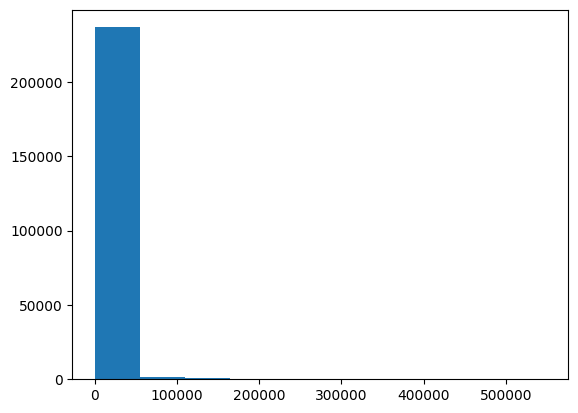

In [5]:
# Histograms are commonly used to check the normality of a dataset.

plt.hist(data=df,x="FullResolutionTime")


<Axes: xlabel='FullResolutionTime'>

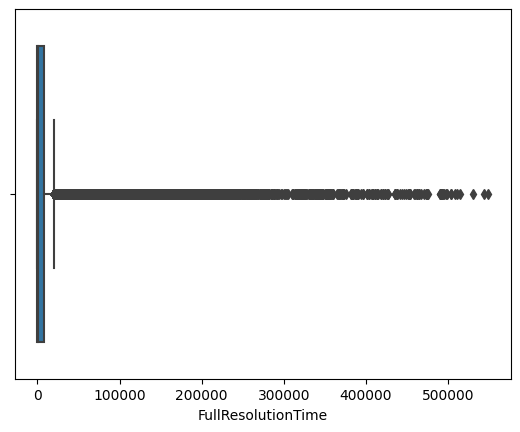

In [6]:
#Box-Plot - showing the median, quartiles, and outliers
# 
# Box plots are commonly used to check for outliers and compare the distributions of multiple datasets.
# 
sns.boxplot(data=df,x="FullResolutionTime") 

### Missing Data <a id='missingdata'></a>

- ##### Remove rows and columns
- ##### Impute data
    - Mean
    - Median
    - Mode
    - [Regression Imputation](#regressionimputation1)
    - [K-nearest Neighbors Imputation](#knearest)

#### Remove rows and columns

In [7]:
##### Remove rows and columns
# Count number of blank rows in column Assigned Tier
print('Number of blank rows in column Assingned Tier :',len(df[df.AssigneeTier.isnull()]))
print('% of blank rows in the column :',(len(df[df.AssigneeTier.isnull()])*100/len(df.AssigneeTier)))

#remove null values from AssigneeTier
print('New number of rows after removed rows :',len(df.dropna(subset=['AssigneeTier'])))


Number of blank rows in column Assingned Tier : 32655
% of blank rows in the column : 13.568653522531319
New number of rows after removed rows : 208010


#### Impute

In [8]:
# mean, median or mode
# Examples
# Calculate the median of each column
median_first_reply_time = df['FirstReplyTime'].median()
mode_num_agent_comments = df['NumAgentComments'].mode()
mean_num_public_comments = df['NumPublicComments'].mean()
mean_first_FullResolutionTime = df['FullResolutionTime'].median()

# Fill missing values with the mean of each column
df['FullResolutionTime_filled'] = df['FullResolutionTime'].fillna(mean_first_FullResolutionTime)
df['FirstReplyTime_filled'] = df['FirstReplyTime'].fillna(median_first_reply_time)
df['NumAgentComments_filled'] = df['NumAgentComments'].fillna(mode_num_agent_comments)
df['NumPublicComments_filled'] = df['NumPublicComments'].fillna(mean_num_public_comments)

Regression Imputation <a id='regressionimputation1'></a>

- Fill the values that are missing with a regression algorithm that predicts the value missing, only used when the variable to predict is expected to be important

In [15]:
columns_numeric=['FirstReplyTime','FullResolutionTime','NumAgentComments','NumPublicComments','TicketEscalated','WorkerTenure']

df_train=df[columns_numeric]

# separate column with missing values
X = df_train.drop(['FullResolutionTime'], axis=1)
y = df_train['FullResolutionTime']

# separate complete and incomplete datasets
X_complete = X.dropna()
X_incomplete = X[~X.index.isin(X_complete.index)]
y_complete = y.dropna()
y_incomplete = y[~y.index.isin(y_complete.index)]

from sklearn.linear_model import LinearRegression

# fit linear regression to complete dataset
regressor = LinearRegression()
regressor.fit(X_complete, y_complete)

# predict missing values in incomplete dataset
y_pred = regressor.predict(X_incomplete)

# replace missing values in original dataset
#df.loc[df['FullResolutionTime'].isna(), 'FullResolutionTime'] = y_pred


ValueError: Found input variables with inconsistent numbers of samples: [157165, 239741]

<Axes: >

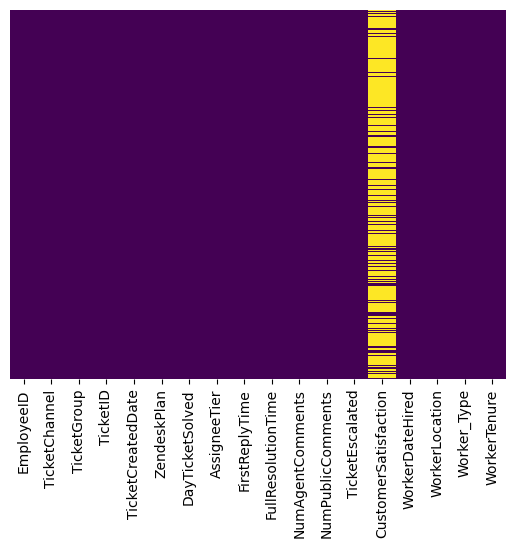

In [ ]:
#Fill ZendeskPlan with the Unknown value that it already had
df.ZendeskPlan.fillna('Unknown', inplace=True)

# Calculate the median of each column
mean_first_reply_time = df['FirstReplyTime'].median()
mean_num_agent_comments = df['NumAgentComments'].median()
mean_num_public_comments = df['NumPublicComments'].median()
mean_first_FullResolutionTime = df['FullResolutionTime'].median()

# Fill missing values with the mean of each column
df['FullResolutionTime'] = df['FullResolutionTime'].fillna(mean_first_FullResolutionTime)
df['FirstReplyTime'] = df['FirstReplyTime'].fillna(mean_first_reply_time)
df['NumAgentComments'] = df['NumAgentComments'].fillna(mean_num_agent_comments)
df['NumPublicComments'] = df['NumPublicComments'].fillna(mean_num_public_comments)

#df["DayTicketSolved"].isnull().sum() has 924 records as null, because its low we can drop the rows
df.dropna(subset=['DayTicketSolved'], inplace=True)

#df["AssigneeTier"].isnull().sum() has 32655 nulls
# we need to fill this data and we are going to use mode() that returns the most frequent value
df['AssigneeTier'].fillna(df['AssigneeTier'].mode()[0], inplace=True)


#plot null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### K-nearest Neighbors Imputation <a id='knearest'></a>

### Outliers <a id='outliers'></a>

### Logarithmic Transformation <a id='log'></a> 

### Square Root Tranformation <a id='sqrt'></a> 

### Box-Cox Tranformation <a id='bct'></a> 

#### Save new Dataset for the next steps

In [ ]:
# save the DataFrame to a CSV file
next_directory="3 - Exploratory Data Analysis"
df.to_csv('../../'+next_directory +'/Dataset//df_form_previous_step.csv', index=False)

# save the DataFrame to a CSV file
next_directory="4 - Feature Engineering"
df.to_csv('../../'+next_directory +'/Dataset//df_form_previous_step.csv', index=False)